<a href="https://colab.research.google.com/github/masterNLPIA2223/SeminarioComputacionProgramacion/blob/main/Python/Sesion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sesión 1: Introducción a Python

En este primer notebook veremos una breve introducción al [lenguaje de programación](https://es.wikipedia.org/wiki/Lenguaje_de_programaci%C3%B3n) Python. Este notebook está basado en el libro [*An introduction to Python for Linguists*](https://v4py.github.io/intro.html). A lo largo del notebook veréis que aparecen distintos enlaces, es conveniente que los sigáis y leáis el contenido de los mismos. 

## Introducción a Python

Python es un lenguaje de programación:
- Creado a principios de los 90.
- Nombre procede del programa de la BBC ["Monty Python's Flying Circus"](https://en.wikipedia.org/wiki/Monty_Python%27s_Flying_Circus).
- Multiplataforma.
- Amplia biblioteca con cientos de módulos.
- Distintos paradigmas de programación.
- Trabajaremos con Python 3.6.

## Trabajando con Python

Existen distintos modos de trabajar con Python.

### Modo interactivo

- Línea de comandos interactiva (intérprete).
- Código no se guarda.
- Sirve para hacer pruebas rápidas. 
- Uso (entorno [REPL](https://en.wikipedia.org/wiki/Read%E2%80%93eval%E2%80%93print_loop)):
    - Arrancar el interprete ``> python``.
    - Escribir expresión.
    - Evaluar expresión.
    - Intérprete escribe resultado. 

### Guiones

Guiones son ficheros de texto que permiten guardar nuestros programas Python. 
- Crear fichero de texto (guión) con extensión ``.py``.
- Uso:
    - Crear guión.
    - Ejecutar guión.
    

### Notebooks de Jupyter

- Combina guiones con modo interactivo.
- Se intercalan explicaciones con código.
- Se pueden exportar los programas para usarlos como guiones. 

In [1]:
3+2

5

## Un primer ejemplo práctico: análisis de frecuencias de un texto

Con el objetivo de ver qué cosas se pueden hacer con Python, vamos a utilizarlo para hacer un análisis de frecuencias de un texto. Aunque profundizaremos con más detalle en las próximas sesiones, consideramos que es una buena idea ver qué cosas se pueden hacer con Python. Esto permitirá tener una perspectiva global.

Es normal que no entendáis algunos de los conceptos que aparecerán a continuación, pero podéis estar tranquilos, es normal al principio e iremos desgranándolos a lo largo de las sesiones. El objetivo en este punto es que os familiaricéis con el código Python.



Empezamos instalando la [librería](https://es.wikipedia.org/wiki/Biblioteca_(inform%C3%A1tica)) `requests_html` mediante el [gestor de paquetes `pip`](https://pip.pypa.io/en/stable/). Esta librería proporciona funcionalidad para descargar páginas HTML desde la web. 

In [2]:
!pip install requests_html -Uq

     |████████████████████████████████| 83 kB 899 kB/s 
     |████████████████████████████████| 140 kB 4.5 MB/s 
     |████████████████████████████████| 112 kB 40.4 MB/s 
     |████████████████████████████████| 127 kB 34.4 MB/s 


A continuación vamos a importar el **objeto** `HTMLSession` de la [librería](https://es.wikipedia.org/wiki/Biblioteca_(inform%C3%A1tica)) `requests_html`. 

In [3]:
from requests_html import HTMLSession

Ahora podemos crear un **objeto** `HTMLSession` y almacenarlo en la **variable** sesion. 

In [4]:
sesion = HTMLSession()

A través del **método** `get()` del objeto `sesion` podemos descargar una página web pasándo el enlace dicha página web como **argumento**. El resultado es una respuesta HTTP.  

In [5]:
enlace = 'https://es.wikipedia.org/wiki/Inteligencia_artificial'
respuesta = sesion.get(enlace)

Si mostramos la variable `respuesta` veremos `<Response [200]>`. El código 200 es el [código de estado HTTP](https://developer.mozilla.org/es/docs/Web/HTTP/Status) que indica que nuestra petición recibió una respuesta exitosa. 

In [6]:
respuesta

<Response [200]>

El contenido de la página web está almacenado en el **atributo** `.html` del objeto `respuesta`.

In [7]:
respuesta.html

<HTML url='https://es.wikipedia.org/wiki/Inteligencia_artificial'>

El atributo anterior es a su vez un objeto que tiene sus propios atributos y métodos que nos permiten inspeccionarlo y manipularlo. Por ejemplo, tiene un atributo `.html` que nos permite leer el [código HTML](https://es.wikipedia.org/wiki/HTML) de la página web. 

In [8]:
respuesta.html.html

'<!DOCTYPE html>\n<html class="client-nojs" lang="es" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Inteligencia artificial - Wikipedia, la enciclopedia libre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"],"wgRequestId":"f5ad199e-8d33-4970-a240-bc36fc709afa","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Inteligencia_artificial","wgTitle":"Inteligencia artificial","wgCurRevisionId":145934367,"wgRevisionId":145934367,"wgArticleId":1503,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia:Artículos con pasajes que requieren referencias","Wikipedia:Artículos con

Si visitas la página que estamos [descargando](https://es.wikipedia.org/wiki/Inteligencia_artificial), no verás en ningún momento el texto `<!DOCTYPE html>`, esto se debe a que dicho texto forma parte de las etiquetas del  lenguaje HTML que se encargan de decir al navegador cómo mostrar una página web. 

Si queremos extraer el contenido de la página web, debemos buscar la etiqueta que contiene el texto. En este caso dicha etiqueta se llama `bodyContent` y podemos extraerla buscándola en el código html de nuestra respuesta mediante el método `find`. Para evitar que el resultado devuelto por dicha búsqueda incluya etiquetas html, debemos incluir el argumento `clean=True`. 

In [9]:
contenido = respuesta.html.find("#bodyContent", clean=True)

Si mostramos la variable contenido, veremos que es una lista con un objeto `Element`, si queremos acceder al texto, deberemos obtener el primer elemento de la lista (los elementos de una lista en Python empiezan en la [posición 0](https://hmong.es/wiki/Zero-based_numbering)), y a continuación al atributo `text` del objeto.

In [10]:
contenidoReal = contenido[0].text
contenidoReal

'De Wikipedia, la enciclopedia libre\nIr a la navegación Ir a la búsqueda\nLa inteligencia artificial tiene el principal objetivo de replicar los procesos cognitivos en máquinas.\nLa inteligencia artificial es, en ciencias de la computación, la disciplina que intenta replicar y desarrollar la inteligencia y sus procesos implícitos a través de computadoras. No existe un acuerdo sobre la definición completa de inteligencia artificial, pero se han seguido cuatro enfoques: dos centrados en los humanos (sistemas que piensan como humanos, y sistemas que actúan como humanos) y dos centrados en torno a la racionalidad (sistemas que piensan racionalmente y sistemas que actúan racionalmente). Comenzó poco después de la Segunda Guerra Mundial, y el nombre se acuñó en 1956 en la Conferencia de Dartmouth por el informático John McCarthy.\nLa inteligencia artificial abarca en la actualidad una gran variedad de subcampos, que van desde áreas de propósito general, como el aprendizaje y la percepción, 

Ya tenemos el texto sobre el que queremos realizar nuestro análisis de frecuencias. Para ello necesitamos partir el texto en palabras o **tokens**.

La **tokenización** (el proceso de separar un texto en palabras) puede parecer sencillo, pero es más difícil de lo que parece ya que tenemos que separar los signos de puntuación de las palabras. Para ello, vamos a usar la librería [nltk](http://www.nltk.org/). La librería nltk ya se encuentra instalada en nuestro entorno, por lo que podemos importarla directamente. Además, debemos descargar los signos de puntuación mediante el método `download` de la librería.

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

La librería nltk proporciona la función `word_tokenize()` que se encarga del proceso de tokenización y que devuelve como resultado una lista de los tokens de un texto. 

In [12]:
tokenizado = nltk.word_tokenize(contenidoReal.lower(),language="spanish")
tokenizado

['de',
 'wikipedia',
 ',',
 'la',
 'enciclopedia',
 'libre',
 'ir',
 'a',
 'la',
 'navegación',
 'ir',
 'a',
 'la',
 'búsqueda',
 'la',
 'inteligencia',
 'artificial',
 'tiene',
 'el',
 'principal',
 'objetivo',
 'de',
 'replicar',
 'los',
 'procesos',
 'cognitivos',
 'en',
 'máquinas',
 '.',
 'la',
 'inteligencia',
 'artificial',
 'es',
 ',',
 'en',
 'ciencias',
 'de',
 'la',
 'computación',
 ',',
 'la',
 'disciplina',
 'que',
 'intenta',
 'replicar',
 'y',
 'desarrollar',
 'la',
 'inteligencia',
 'y',
 'sus',
 'procesos',
 'implícitos',
 'a',
 'través',
 'de',
 'computadoras',
 '.',
 'no',
 'existe',
 'un',
 'acuerdo',
 'sobre',
 'la',
 'definición',
 'completa',
 'de',
 'inteligencia',
 'artificial',
 ',',
 'pero',
 'se',
 'han',
 'seguido',
 'cuatro',
 'enfoques',
 ':',
 'dos',
 'centrados',
 'en',
 'los',
 'humanos',
 '(',
 'sistemas',
 'que',
 'piensan',
 'como',
 'humanos',
 ',',
 'y',
 'sistemas',
 'que',
 'actúan',
 'como',
 'humanos',
 ')',
 'y',
 'dos',
 'centrados',
 'en',


Notar que en el paso anterior, no solo hemos tokenizado, sino que hemos pasado el texto a minúsculas mediante el método `.lower()`. Esto es debido a que en nuestro análisis de frecuencias no queremos distinguir, por ejemplo, entre *palabra* y *Palabra*. Ahora, podemos ver el número de tokens de nuestra lista mediante el método `len`.

In [13]:
len(tokenizado)

9150

Sin embargo, la anterior lista contiene una gran cantidad de tokens que no nos interesan para nuestro análisis de frecuencias. En primer lugar, tenemos los signos de puntuación. Además, las palabras más comunes en un texto en español serán palabras como *el* o *la*, por lo que nos gustaría poder descartarlas. Esto lo podemos hacer gracias a la librería nltk que proporciona una lista de las palabras *aburridas* que se conocen como **stopwords** (o palabras vacías).

In [14]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_list = stopwords.words("spanish")
stop_list

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

Podemos ahora descartar dichos tokens poco interesantes. El siguiente código es algo más complicado que los anteriores ya que involucra un **flujo de control** lo que indica que no se ejecuta de forma lineal, sino que se ejecuta en bucle (el comando **for**), y puede saltarse algunas partes del código dependiendo de si una condición se **evalúa** a verdadero o falso (el comando **if**).

In [15]:
# Creamos una lista vacía
limpia = []
# Iteramos sobre todos los tokens en la lista tokenizada
for token in tokenizado:
  # Comprobamos si el token actual es "interesante" (es decir, no es un signo 
  # de puntuación ni está en la lista de palabras vacías)
  if token.isalpha() and (token not in stop_list):
    # Si se cumple que es interesante, añadimos el token a la lista limpia
    limpia.append(token)

# Al final comprobamos la longitud de nuestra lista
len(limpia)

4081

El número de palabras de la lista limpia es aproximadamente la mitad que el de la lista original. Notar como en el lenguaje Python se utiliza la indentaciópn para codificar la jerarquía de comandos: todo lo que está indentado bajo la cabecera del bucle for en la cuarta línea es parte del cuerpo del bucle for y se ejecuta para cada token de la lista tokenizada. De manera similar, todo lo que está indentado por debajo de la cabecerea if solo se ejecuta si la expresión de la condición se satisface. Al desindentar, nos salimos de los fors e ifs. De este modo la última linea del código sólo se ejecuta una vez.  

Ahora ya podemos crear nuestra distribución de frecuencias usando la **clase** `nltk.FreqDist`. Esto es sencillo ya que solo tenemos que pasarle nuestra lista de tokens limpios. 

In [16]:
distribucion_frecuencias = nltk.FreqDist(limpia)
distribucion_frecuencias

FreqDist({'artificial': 118, 'inteligencia': 108, 'sistemas': 41, 'pp': 39, 'norvig': 27, 'consultado': 26, 'russell': 25, 'inglés': 25, 'ser': 24, 'humanos': 23, ...})

Podemos acceder a los **valores** individuales dentro de la distribución de frecuencias usando la **clave** correspondiente. 

In [17]:
distribucion_frecuencias["artificial"]

118

También podemos listar los $n$ items más frecuentes usando el método `.most_common()`.

In [18]:
distribucion_frecuencias.most_common(10)

[('artificial', 118),
 ('inteligencia', 108),
 ('sistemas', 41),
 ('pp', 39),
 ('norvig', 27),
 ('consultado', 26),
 ('russell', 25),
 ('inglés', 25),
 ('ser', 24),
 ('humanos', 23)]

Finalmente podemos visualizar usando nuestra distribución de frecuencias con una nube de palabras para ver aquellas que son más importantes. 

In [19]:
# La instalación del paquete corpy puede llevar unos segundos. 
!pip install corpy -Uq

     |████████████████████████████████| 304 kB 8.0 MB/s 
     |████████████████████████████████| 425 kB 57.8 MB/s 


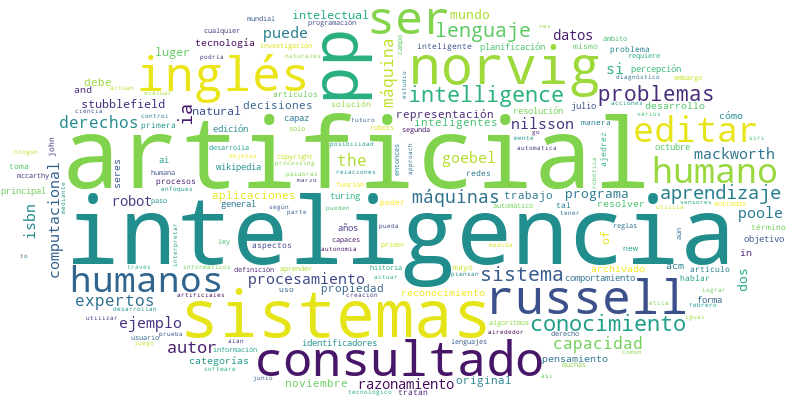

In [20]:
from corpy.vis import wordcloud

wordcloud(distribucion_frecuencias, size=(800,400), rounded=True)

Finalmente, podemos juntar todo el código que hemos desarrollado en una función para poder ejecutarlo con otras páginas de la wikipedia de manera sencilla. 

In [21]:
def wikipedia_wordcloud(enlace, size=(800,400), rounded=True):
  sesion = HTMLSession()
  respuesta = sesion.get(enlace)
  divs = respuesta.html.find("#bodyContent", clean=True)
  # Esperamos que solo haya un cuerpo principal en la entrada de wikipedia,
  # en caso de no ser así, suspendemos la ejecución.
  assert len(divs) == 1, "Esperado un div con ID bodyContent, se encontraron más"
  texto = divs[0].text
  tokenizado = nltk.word_tokenize(texto.lower())
  stop_list = nltk.corpus.stopwords.words("spanish")
  limpio = []
  for token in tokenizado:
    if token.isalpha() and (token not in stop_list):
      limpio.append(token)
  # Para generar la nube de palabras no es necesario construir la distribución
  # de frecuencias, es suficiente con la lista de palabras. 
  return wordcloud(limpio, size=size, rounded=rounded)

Ahora podemos crear de manera sencilla de cualquier otra página de la Wikipedia. 

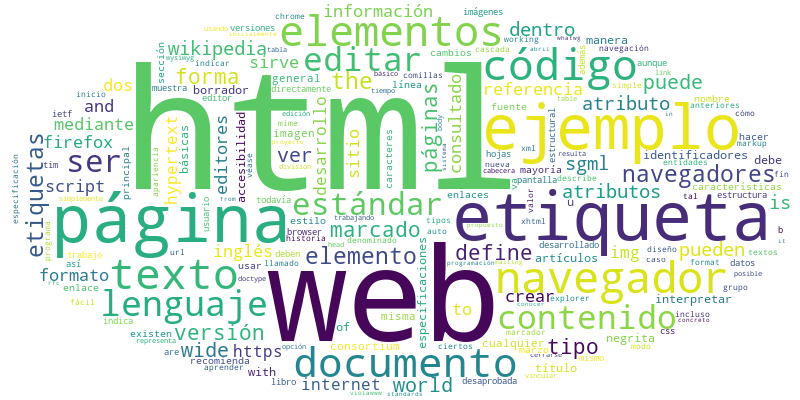

In [22]:
wikipedia_wordcloud("https://es.wikipedia.org/wiki/HTML")

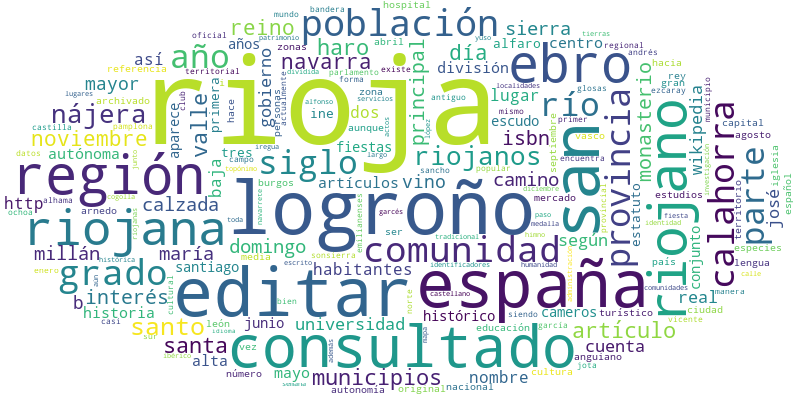

In [23]:
wikipedia_wordcloud("https://es.wikipedia.org/wiki/La_Rioja_(Espa%C3%B1a)")

Este es el verdadero poder de la programación. Una vez que has encontrado una receta, puedes aplicarla a datos similares a gran velocidad y obteniendo resultados consistentes todas las veces. 